In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from keras.applications import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from keras.models import Model

# Step 1: Loading Labels

label_file_path = "/content/drive/MyDrive/Oil_GVF_prediction_CNN_models/oil_water_label.csv"
labels_df = pd.read_csv(label_file_path)

# Step 2: Feature Extraction

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Remove the last layer of ResNet50 and use the output of the second last layer as features
model = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)

# Define a function to extract features from images
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()


94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# Step 3: Data Labeling

# Merge labels with image paths
data = []
for index, row in labels_df.iterrows():
    experiment_name = row['Experiment Number']
    bg_flow = row['Background Flow (m3/h)']
    WaterCut = row['water cut (%)']
    folder_path = os.path.join("/content/drive/MyDrive/Oil_GVF_prediction_CNN_models/stft_oil_water", experiment_name)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        features = extract_features(img_path)
        data.append([experiment_name, bg_flow, WaterCut, img_path] + features.tolist())


1/1 [==============================] - 0s 201ms/step


In [ ]:
# Create DataFrame
columns = ['Experiment Number', 'Background Flow', 'WaterCut', 'Image Path'] + [f'feature_{i}' for i in range(100352)]
df = pd.DataFrame(data, columns=columns)

In [ ]:
df.head()

,Experiment Number,Background Flow,WaterCut,Image Path,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_100342,feature_100343,feature_100344,feature_100345,feature_100346,feature_100347,feature_100348,feature_100349,feature_100350,feature_100351
0,be22007_000,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.704112,-2.407605,-1.657305,-0.571712,-3.032980,-0.431641,...,-0.314348,-5.165875,-3.773847,-2.038293,1.057652,-3.201055,0.043826,-0.798262,1.928447,4.342771
1,be22007_000,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-2.007420,-1.857557,-1.782360,0.409304,-2.429142,-0.547343,...,1.781727,-4.862500,-2.713357,-1.649416,-0.065765,-3.518343,-0.412726,-1.092676,0.242206,3.830615
2,be22007_000,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.796762,-1.993771,-1.962892,2.325828,-2.645463,1.255233,...,3.950834,-4.678708,-3.662419,-1.379766,0.623397,-3.291280,-0.203477,-1.210324,0.867371,6.686132
3,be22007_000,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.737471,-1.726743,-2.082922,2.394396,-1.945735,2.245593,...,1.907041,-4.231230,-3.241199,-1.708435,0.100133,-3.730419,0.004276,-1.048185,0.479222,3.981187
4,be22007_000,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.770987,-1.801598,-1.730463,0.996756,-1.956371,-0.065137,...,1.321373,-4.036424,-2.983791,-1.512003,0.127408,-3.245956,-1.111794,-1.402104,1.085548,4.464328


In [ ]:
y_bg_flow = df['Background Flow']  # Background Flow
y_WaterCut = df['WaterCut']  # WaterCut

In [ ]:
# Split features and target variables
X = df.drop(columns=["Experiment Number", 'Background Flow', 'WaterCut', 'Image Path'])  # Excluding target variables only
y = df[['Background Flow', 'WaterCut']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a regression model (example: RandomForestRegressor)
reg_model = RandomForestRegressor()
reg_model.fit(X_train, y_train)

# Predictions for test set
predictions = reg_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [ ]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 10.646111111111114
Mean Squared Error (MSE): 215.13286851851848
R-squared (R2) Score: 0.6137937297900582


In [ ]:
predictions

array([[ 8.25, 61.05],
       [ 8.75, 50.7 ],
       [ 8.25, 48.39],
       [15.25, 27.46],
       [20.25, 29.25],
       [ 8.75, 58.6 ],
       [ 7.5 , 68.34],
       [17.5 , 36.18],
       [11.5 , 53.67],
       [11.5 , 42.95],
       [25.25, 14.56],
       [ 9.75, 46.1 ],
       [13.5 , 44.89],
       [11.  , 25.34],
       [26.75, 17.89],
       [28.75, 17.13],
       [12.25, 40.85],
       [ 9.5 , 64.74],
       [22.75, 19.66],
       [ 9.75, 68.65],
       [ 9.  , 48.3 ],
       [ 9.  , 24.67],
       [17.75, 28.78],
       [10.  , 24.62],
       [13.75, 39.44],
       [ 8.75, 51.94],
       [11.25, 57.87]])

In [ ]:
import math
# Function to predict Background Flow and WaterCut for a single image
def predict_values_for_image(img_path):
    # Extract features from the image
    features = extract_features(img_path)

    # Reshape the features to match the input shape expected by the model
    features = features.reshape(1, -1)

    # Predict Background Flow and WaterCut values
    flow_rate_prediction = reg_model.predict(features)

    return flow_rate_prediction[0][0], flow_rate_prediction[0][1]

In [ ]:
# Example usage
new_image_path = "/content/drive/MyDrive/Oil_GVF_prediction_CNN_models/stft_oil_water/be22007_008/21_02_2022_12_24_18_00_hdf5.png"
bg_flow_pred, WaterCut_pred = predict_values_for_image(new_image_path)

print("Predicted Background Flow:", math.ceil(bg_flow_pred))
print("Predicted WaterCut:", math.ceil(WaterCut_pred))


1/1 [==============================] - 0s 420ms/step
Predicted Background Flow: 8
Predicted WaterCut: 69


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


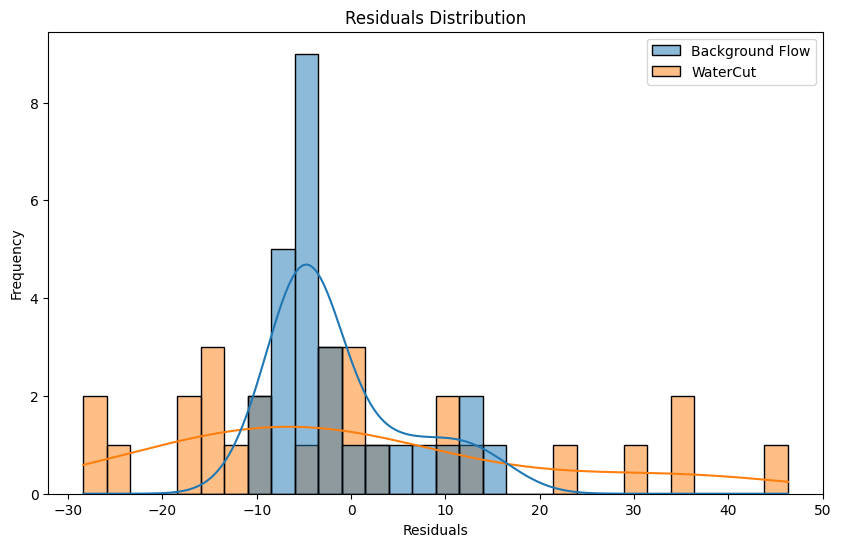

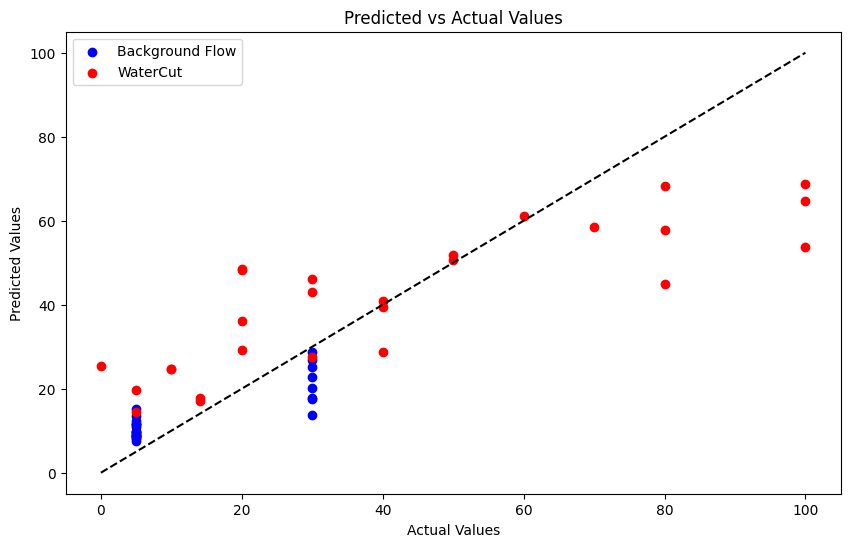

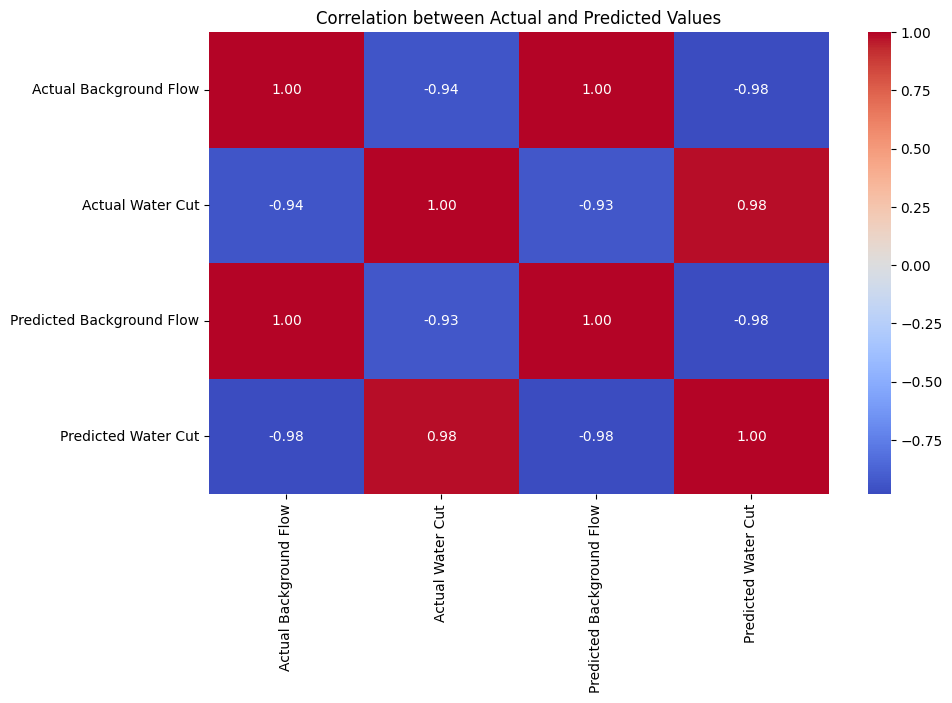

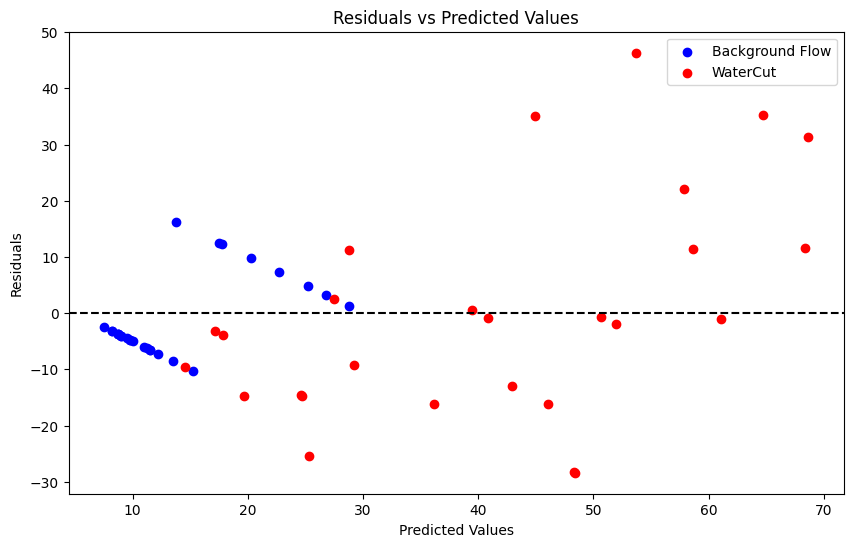

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the residuals
residuals = y_test - predictions

# Plotting residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test['Background Flow'], predictions[:, 0], color='blue', label='Background Flow')
plt.scatter(y_test['WaterCut'], predictions[:, 1], color='red', label='WaterCut')
plt.plot([0, max(max(y_test['Background Flow']), max(y_test['WaterCut']))], [0, max(max(y_test['Background Flow']), max(y_test['WaterCut']))], color='black', linestyle='--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()



plt.figure(figsize=(10, 6))

# Add a small value to the diagonal of the covariance matrix
epsilon = 1e-9
cov_matrix = np.cov(np.concatenate((y_test, predictions), axis=1), rowvar=False)
# Compute the correlation matrix
corr_matrix = np.corrcoef(cov_matrix)

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=['Actual Background Flow', 'Actual Water Cut', 'Predicted Background Flow', 'Predicted Water Cut'],
            yticklabels=['Actual Background Flow', 'Actual Water Cut', 'Predicted Background Flow', 'Predicted Water Cut'])
plt.title('Correlation between Actual and Predicted Values')
plt.show()

# Scatter plot of residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(predictions[:, 0], residuals['Background Flow'], color='blue', label='Background Flow')
plt.scatter(predictions[:, 1], residuals['WaterCut'], color='red', label='WaterCut')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [ ]:
background_flow_actual = y_test['Background Flow'].to_numpy()
watercut_actual = y_test['WaterCut'].to_numpy()
background_flow_predicted = predictions[:, 0]
watercut_predicted = predictions[:, 1]

data_ = {
    'Background Flow (Actual)': background_flow_actual,
    'Background Flow (Predicted)': background_flow_predicted,
    'WaterCut (Actual)': watercut_actual,
    'WaterCut (Predicted)': watercut_predicted
}

df_ = pd.DataFrame(data_)
pd.set_option('display.float_format', '{:.2f}'.format)  # Set decimal places to 2
print(df_.to_string(index=False))

 Background Flow (Actual)  Background Flow (Predicted)  WaterCut (Actual)  WaterCut (Predicted)
                        5                         8.50                 60                 61.10
                        5                         9.00                 50                 49.58
                        5                        10.25                 20                 50.30
                        5                        17.75                 30                 29.31
                       30                        22.50                 20                 27.56
                        5                         8.75                 70                 58.20
                        5                         8.25                 80                 69.18
                       30                        18.00                 20                 32.11
                        5                         9.75                100                 58.85
                        5               

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
def train_and_evaluate_model(models, X_train, y_train, X_test, y_test):
    # Train the model
    models.fit(X_train, y_train)

    # Predictions for test set
    predictions = models.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return mae, mse, r2, predictions

In [ ]:
from sklearn.multioutput import MultiOutputRegressor

# Initialize the models
gradient_boosting_model = GradientBoostingRegressor()
svr_model = SVR()
neural_network_model = MLPRegressor()

# Wrap each model with MultiOutputRegressor
multioutput_gb = MultiOutputRegressor(gradient_boosting_model)
multioutput_svr = MultiOutputRegressor(svr_model)
multioutput_nn = MultiOutputRegressor(neural_network_model)

# Train and evaluate each multi-output model
multioutput_gb.fit(X_train, y_train)
multioutput_svr.fit(X_train, y_train)
multioutput_nn.fit(X_train, y_train)

predictions_gb = multioutput_gb.predict(X_test)
predictions_svr = multioutput_svr.predict(X_test)
predictions_nn = multioutput_nn.predict(X_test)

# Evaluate the models
mae_gb = mean_absolute_error(y_test, predictions_gb)
mse_gb = mean_squared_error(y_test, predictions_gb)
r2_gb = r2_score(y_test, predictions_gb)

mae_svr = mean_absolute_error(y_test, predictions_svr)
mse_svr = mean_squared_error(y_test, predictions_svr)
r2_svr = r2_score(y_test, predictions_svr)

mae_nn = mean_absolute_error(y_test, predictions_nn)
mse_nn = mean_squared_error(y_test, predictions_nn)
r2_nn = r2_score(y_test, predictions_nn)

# Print evaluation metrics for each model
print("Gradient Boosting Regressor:")
print("MAE:", mae_gb)
print("MSE:", mse_gb)
print("R^2:", r2_gb)

print("\nSupport Vector Regressor:")
print("MAE:", mae_svr)
print("MSE:", mse_svr)
print("R^2:", r2_svr)

print("\nNeural Network Regressor:")
print("MAE:", mae_nn)
print("MSE:", mse_nn)
print("R^2:", r2_nn)


Gradient Boosting Regressor:
MAE: 8.85559406157227
MSE: 197.1747058703648
R^2: 0.5798628371899517

Support Vector Regressor:
MAE: 15.948094953623531
MSE: 535.0382862559841
R^2: -0.06401309840827885

Neural Network Regressor:
MAE: 26.80780587669966
MSE: 1481.8553440551882
R^2: -1.4557322116189468


In [ ]:
# Create a function to predict on a single image
def predict_on_single_image(image_path):
    # Extract features from the image
    features = extract_features(image_path)

    # Reshape features to match expected input shape
    features = np.array(features).reshape(1, -1)

    # Predict using the multi-output regressor models
    predictions_gb = multioutput_gb.predict(features)
    predictions_svr = multioutput_svr.predict(features)
    predictions_nn = multioutput_nn.predict(features)

    return predictions_gb, predictions_svr, predictions_nn

# Provide the path to the single image you want to predict
single_image_path = "/content/drive/MyDrive/Oil_GVF_prediction_CNN_models/stft_oil_water/be22007_008/21_02_2022_12_24_18_00_hdf5.png"

# Predict on the single image
predictions_gb, predictions_svr, predictions_nn = predict_on_single_image(single_image_path)

# Print the predictions
print("Predictions for the single image:")
print("Gradient Boosting Regressor Prediction:", predictions_gb)
print("Support Vector Regressor Prediction:", predictions_svr)
print("Neural Network Regressor Prediction:", predictions_nn)


1/1 [==============================] - 0s 200ms/step
Predictions for the single image:
Gradient Boosting Regressor Prediction: [[ 5.73707094 84.98091211]]
Support Vector Regressor Prediction: [[ 5.05391185 40.02398216]]
Neural Network Regressor Prediction: [[ 0.22334453 -0.0251756 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ML